**CII4Q3 Visi Komputer**

---



#Exercise 7: Car Detection

---
1.   Lengkapi code pada bagian #YOUR CODE HERE atau #YOUR CODE GOES HERE atau # YOUR CODE STARTS HERE  ...# YOUR CODE ENDS HERE.
2.   Tingkatkan akurasi

# **ASSIGNMENT 7**
# **DZAKY RAIHAN AHMAD - 1301204316**

# Car detection

You will learn about object detection using the very powerful YOLO model. Many of the ideas in this notebook are described in the two YOLO papers: Redmon et al., 2016 (https://arxiv.org/abs/1506.02640) and Redmon and Farhadi, 2016 (https://arxiv.org/abs/1612.08242).

**You will learn to**:
- Use object detection on a car detection dataset
- Deal with bounding boxes

Run the following cell to load the packages and dependencies that are going to be useful for your journey!

# **MENGGUNAKAN YOLOV8**

In [ ]:
import os
import pandas as pd
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import yaml
import torch
from tqdm.auto import tqdm
import shutil

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 283MB/s]


In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
img = 'data/testing_images/vid_5_26760.jpg'

In [ ]:
from PIL import Image

image_path = img
image = Image.open(image_path)

image_array = np.array(image)

image_dtype = image_array.dtype

print("Image data type:", image_dtype)

Image data type: uint8


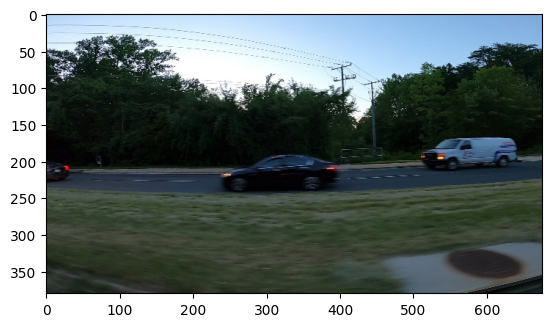

In [ ]:
plt.imshow(image_array)

In [ ]:
results = model.predict(image_array, conf = 0.5)


WARNING ⚠️ NMS time limit 0.550s exceeded
0: 384x640 1 car, 1 truck, 174.8ms
Speed: 20.1ms preprocess, 174.8ms inference, 1042.3ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
for result in results:
    boxes = result.boxes

In [ ]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 7.], device='cuda:0')
conf: tensor([0.8407, 0.7928], device='cuda:0')
data: tensor([[235.8674, 190.3943, 400.3111, 242.1147,   0.8407,   2.0000],
        [509.8056, 167.3469, 643.6242, 213.6468,   0.7928,   7.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (380, 676)
shape: torch.Size([2, 6])
xywh: tensor([[318.0893, 216.2545, 164.4437,  51.7204],
        [576.7149, 190.4969, 133.8186,  46.2999]], device='cuda:0')
xywhn: tensor([[0.4705, 0.5691, 0.2433, 0.1361],
        [0.8531, 0.5013, 0.1980, 0.1218]], device='cuda:0')
xyxy: tensor([[235.8674, 190.3943, 400.3111, 242.1147],
        [509.8056, 167.3469, 643.6242, 213.6468]], device='cuda:0')
xyxyn: tensor([[0.3489, 0.5010, 0.5922, 0.6371],
        [0.7542, 0.4404, 0.9521, 0.5622]], device='cuda:0')

In [ ]:
class_names = model.names

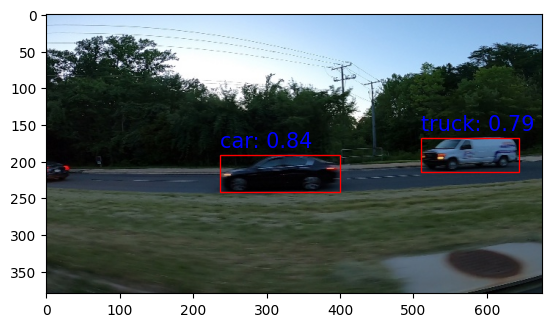

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image_array)

# Iterate over the boxes and annotations
for box, conf, class_idx in zip(boxes.xyxy.cpu(), boxes.conf.cpu(), boxes.cls.cpu()):
    # Get the class index
    class_index = int(class_idx)

    # Get the class name
    class_name = class_names[class_index]

    # Get the box coordinates
    x1, y1, x2, y2 = box[:4]

    # Create a rectangle patch
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')

    # Add the rectangle patch to the axes
    ax.add_patch(rect)

    # Add the label and confidence score
    label = f"{class_name}: {conf:.2f}"
    ax.text(x1, y1 - 10, label, fontsize=15, color='b')

# Show the plot
plt.show()

In [ ]:
train_data ="data/training_images"
csv_data = "data/train_solution_bounding_boxes (1).csv"

test_data ="data/testing_images"

In [ ]:
num_files_c = len(os.listdir(train_data))
num_files_d = len(os.listdir(test_data))

print(f"Jumlah file dalam folder {train_data}: {num_files_c}")
print(f"Jumlah file dalam folder {test_data}: {num_files_d}")

Jumlah file dalam folder data/training_images: 1001
Jumlah file dalam folder data/testing_images: 175


In [ ]:
!mkdir -p "/working/data"

!mkdir -p "/working/data/images"

!mkdir -p "/working/data/images/train"
!mkdir -p "/working/data/images/val"

!mkdir -p "/working/data/labels"

!mkdir -p "/working/data/labels/train"
!mkdir -p "/working/data/labels/val"

In [ ]:
root_dir="/working/data"
labels_dir="/working/data/labels"
images_dir="/working/data/images"

In [ ]:
df=pd.read_csv(csv_data)

width=676
height=380

df["class"]=0
df.rename(columns={'image':'img_name'}, inplace=True)

df["x_centre"]=(df["xmin"]+df["xmax"])/2
df["y_centre"]=(df["ymin"]+df["ymax"])/2
df["width"]=(df["xmax"]-df["xmin"])
df["height"]=(df["ymax"]-df["ymin"])

#normalizing bounding box coordinates
df["x_centre"]=df["x_centre"]/width
df["y_centre"]=df["y_centre"]/height
df["width"]=df["width"]/width
df["height"]=df["height"]/height

df_yolo=df[["img_name","class","x_centre","y_centre","width","height"]]
df_yolo.sample(5)

,img_name,class,x_centre,y_centre,width,height
499,vid_4_9060.jpg,0,0.383467,0.561407,0.134741,0.099741
339,vid_4_26460.jpg,0,0.382417,0.561696,0.181621,0.108108
89,vid_4_13780.jpg,0,0.176918,0.518581,0.062952,0.045045
196,vid_4_1900.jpg,0,0.562590,0.546252,0.183068,0.144144
210,vid_4_1980.jpg,0,0.592619,0.554617,0.144718,0.109395


In [ ]:
img_list = list(sorted(os.listdir(train_data)))
np.random.shuffle(img_list)

In [ ]:
for i, img_name in enumerate(img_list):
    subset = "train"
    if i >= 80/100 * len(img_list):
        subset = "val"


    if np.isin(img_name, df_yolo['img_name']):
        columns = ["class", "x_centre", "y_centre", "width", "height"]
        img_box = df[df['img_name'] == img_name][columns].values
        label_path = os.path.join(labels_dir,subset, img_name[:-4] + ".txt")
        with open(label_path, "w+") as f:
            for row in img_box:
                text = " ".join(row.astype(str))
                f.write(text)
                f.write("\n")

    old_image_path = os.path.join(train_data, img_name)
    new_image_path = os.path.join(images_dir, subset, img_name)
    shutil.copy(old_image_path, new_image_path)

In [ ]:
a = "/working/data/images/train"
b = "/working/data/labels/train"
num_files_a = len(os.listdir(a))
num_files_b = len(os.listdir(b))

print(f"Jumlah file dalam folder {a}: {num_files_a}")
print(f"Jumlah file dalam folder {b}: {num_files_b}")

Jumlah file dalam folder /working/data/images/train: 801
Jumlah file dalam folder /working/data/labels/train: 281


In [ ]:
yolo_format=dict(path="/working/data",
                 train="/working/data/images/train",
                 val="/working/data/images/val",
                 nc=1,
                 names={0:"car"})

with open('/working/yolo.yaml', 'w') as outfile:
    yaml.dump(yolo_format, outfile, default_flow_style=False)

In [ ]:
model.train(data="/working/yolo.yaml",epochs=8,patience=5,batch=8,
                    lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/working/yolo.yaml, epochs=8, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchs

100%|██████████| 755k/755k [00:00<00:00, 43.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 225 layers, 11135987 parameters, 11135971 gradients, 28.6 GFLOPs

Transferred 64/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 190MB/s]


AMP: checks passed ✅


train: Scanning /working/data/labels/train... 281 images, 520 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 3011.79it/s]

train: New cache created: /working/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /working/data/labels/val... 74 images, 126 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 2050.00it/s]

val: New cache created: /working/data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      2.36G      1.653      3.718      1.307          0        640: 100%|██████████| 101/101 [00:25<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        200        134       0.94       0.93      0.976      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8      2.45G      1.331      1.797      1.119          0        640: 100%|██████████| 101/101 [00:21<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.89it/s]

                   all        200        134      0.953      0.917      0.958      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8      2.46G      1.369      1.603      1.125          6        640: 100%|██████████| 101/101 [00:22<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.17it/s]

                   all        200        134      0.952      0.894      0.966      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      2.47G       1.26      1.108      1.092          1        640: 100%|██████████| 101/101 [00:20<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.58it/s]

                   all        200        134      0.946       0.97      0.982       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8      2.47G      1.247     0.9583      1.098          1        640: 100%|██████████| 101/101 [00:19<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]


                   all        200        134      0.963      0.975      0.984        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      2.46G      1.263     0.8336      1.062          1        640: 100%|██████████| 101/101 [00:20<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.41it/s]

                   all        200        134      0.955      0.963      0.981      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8      2.47G      1.207     0.8027      1.061          0        640: 100%|██████████| 101/101 [00:20<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.13it/s]

                   all        200        134      0.957       0.97      0.989       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8      2.46G      1.194     0.7594      1.065          0        640: 100%|██████████| 101/101 [00:19<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.38it/s]

                   all        200        134      0.941       0.96      0.985      0.634



8 epochs completed in 0.056 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]


                   all        200        134      0.941       0.96      0.985      0.635
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b02ce1506d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
path_best_weights="runs/detect/train/weights/best.pt"
model = YOLO(path_best_weights)

metrics = model.val()

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /working/data/labels/val.cache... 74 images, 126 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]


                   all        200        134      0.941       0.96      0.985      0.633
Speed: 0.6ms preprocess, 8.2ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")
print(f"Mean Average Precision @ .50   : {metrics.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

Mean Average Precision @.5:.95 : 0.6333987471170205
Mean Average Precision @ .50   : 0.9847654260328574
Mean Average Precision @ .70   : 0.802179028261425


In [ ]:
with torch.no_grad():
    results=model.predict(source=test_data,conf=0.50,iou=0.75)


image 1/175 /content/data/testing_images/vid_5_25100.jpg: 384x640 (no detections), 78.4ms
image 2/175 /content/data/testing_images/vid_5_25120.jpg: 384x640 (no detections), 10.7ms
image 3/175 /content/data/testing_images/vid_5_25140.jpg: 384x640 (no detections), 10.6ms
image 4/175 /content/data/testing_images/vid_5_25160.jpg: 384x640 (no detections), 10.7ms
image 5/175 /content/data/testing_images/vid_5_25180.jpg: 384x640 (no detections), 10.6ms
image 6/175 /content/data/testing_images/vid_5_25200.jpg: 384x640 (no detections), 10.6ms
image 7/175 /content/data/testing_images/vid_5_25220.jpg: 384x640 (no detections), 10.6ms
image 8/175 /content/data/testing_images/vid_5_25240.jpg: 384x640 (no detections), 10.7ms
image 9/175 /content/data/testing_images/vid_5_25260.jpg: 384x640 (no detections), 10.6ms
image 10/175 /content/data/testing_images/vid_5_26320.jpg: 384x640 (no detections), 10.6ms
image 11/175 /content/data/testing_images/vid_5_26400.jpg: 384x640 (no detections), 10.7ms
image 1

In [ ]:
import os

# Set the locale to UTF-8
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'

# Create the directory
os.system('mkdir -p "/working/predictions"')
prediction_dir = "/working/predictions"


In [ ]:
test_img_list=[]
for result in results:
    if len(result.boxes.xyxy):
        name=result.path.split("/")[-1].split(".")[0]
        boxes=result.boxes.xyxy.cpu().numpy()
        scores=result.boxes.conf.cpu().numpy()

        test_img_list.append(name)

        label_file_path=os.path.join(prediction_dir,name+".txt")
        with open(label_file_path,"w+") as f:
            for score,box in zip(scores,boxes):
                text=f"{score:0.4f} "+" ".join(box.astype(str))
                f.write(text)
                f.write("\n")

In [ ]:
def show_bbox(img,boxes,scores,axis,color=(0,255,0)):
    boxes=boxes.astype(int)
    scores=scores
    img=img.copy()
    for i,box in enumerate(boxes):
        score=f"{scores[i]:.4f}"
        cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),color,2)
        y=box[1]-10 if box[1]-10>10 else box[1]+10
        cv2.putText(img,score,(box[0],y),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

    axis.imshow(img)
    axis.axis("off")

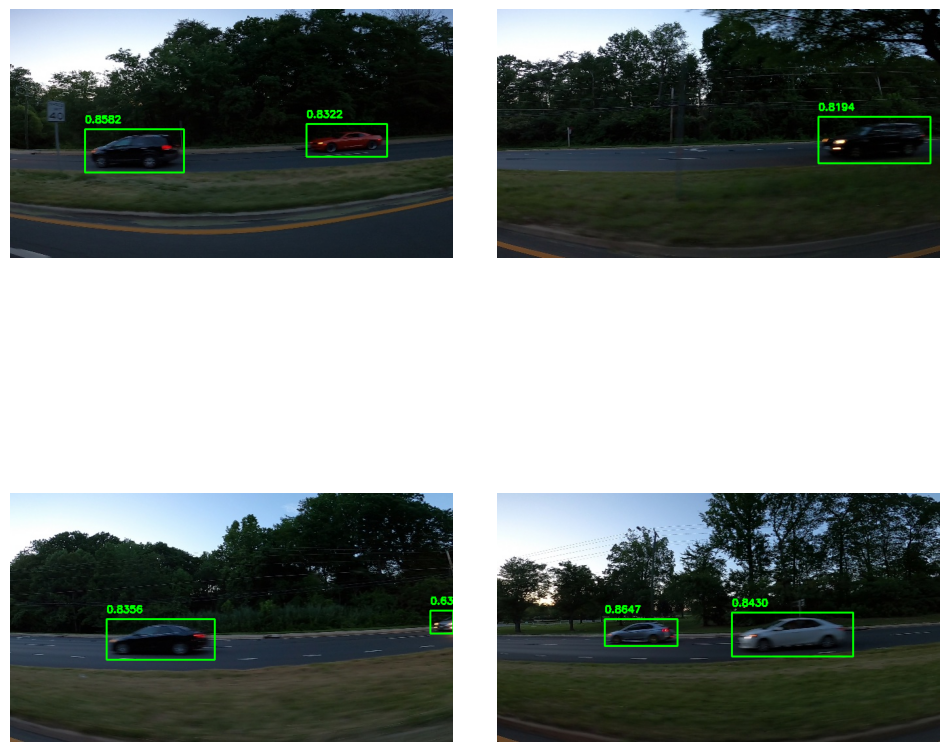

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(12,12))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
ax=axes.flatten()

imgs_name=np.random.choice(test_img_list,4)

for i,img_name in enumerate(imgs_name):
    img_file_path=os.path.join(test_data,img_name+".jpg")
    img=cv2.imread(img_file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    label_file_path=os.path.join(prediction_dir,img_name+".txt")
    label=pd.read_csv(label_file_path,sep=" ",header=None).values
    scores=label[:,0]
    boxes=label[:,1:]
    show_bbox(img,boxes,scores,axis=ax[i])

plt.savefig("prediksi.png")